<a href="https://colab.research.google.com/github/JorgeHdzRiv/Program-neural-networks-with-TensorFlow/blob/main/Lab2_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planteamiento del problema

Entrenarás una red neuronal para que reconozca artículos de ropa de un conjunto de datos común llamado Fashion MNIST. Contiene 70,000 prendas de ropa en 10 categorías diferentes. Cada ropa está en una imagen en escala de grises de 28 × 28.

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

## Pasos iniciales

Empezaremos importando TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


Teniendo etiquetas tales como:

| Etiquetas   |      ***Descripcion ***     |  
|----------|:-------------:|
| 0 |  Camiseta/top | 
| 1 |  Pantalon   |   
| 2 | Sueter|
| 3 | Vestido |
| 4 | Abrigo |
| 5 | Sandalias |
| 6 | Camisa|
| 7 | Zapatos deportivos |
| 8 | Bag |
| 9 | Botas al tobillo |


Los datos de Fashion MNIST están disponibles en la API de tf.keras.datasets. Cárgalo de la siguiente manera:

In [2]:
mnist = tf.keras.datasets.fashion_mnist


Si llamas a load_data en ese objeto, obtendrás dos conjuntos de dos listas: valores training y testing, que representan gráficos que muestran artículos de ropa y sus etiquetas.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


¿Cómo son esos valores? Imprime una imagen de entrenamiento y una etiqueta de entrenamiento para ver. Puedes experimentar con diferentes índices en el array.


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

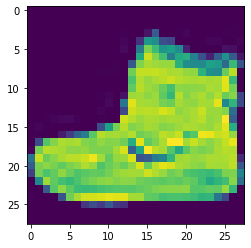

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])


Notarás que todos los valores son números enteros entre 0 y 255. Cuando se entrena una red neuronal, es más fácil tratar todos los valores entre 0 y 1, un proceso llamado normalización. Afortunadamente, Python proporciona una forma fácil de normalizar una lista como esta sin bucles.

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0



También es posible que desees ver 42, un inicio diferente al del índice 0.

Ahora, es posible que se pregunte por qué hay dos conjuntos de datos: entrenamiento y pruebas.

La idea es tener un conjunto de datos para el entrenamiento y otro conjunto de datos que el modelo aún no encuentre a fin de ver cómo clasificar los valores. Después de todo, cuando termines, tendrás que usar el modelo con datos que no había visto antes. Además, sin datos de prueba independientes, correrás el riesgo de que la red solo memorice los datos de entrenamiento sin generalizar sus conocimientos.

## Diseñando el modelo



Ahora, diseña el modelo. Tendrás tres capas. Revíselas una por una y explore los diferentes tipos de capas y los parámetros que se utilizan para cada una.

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: define una secuencia de capas en la red neuronal.

**Flatten**: toma un cuadrado y lo convierte en un vector unidimensional.

**Dense**: agrega una capa de neuronas.

Las funciones **Activation** indican a cada capa de neuronas qué hacer. Hay muchas opciones, pero úsalas por ahora:

**Relu**: significa que, si X es mayor que 0, se muestra X; de lo contrario, se muestra 0. Solo pasa valores de 0 o mayores a la siguiente capa de la red.

**Softmax**: toma un conjunto de valores y elige el más alto con eficacia. Por ejemplo, si el resultado de la última capa es [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], evita que debas ordenar por el valor más grande; muestra [0,0,0,0,1,0,0,0,0.


## Compilando y entrenando el modelo


Ahora que el modelo está definido, lo siguiente que debes hacer es compilarlo. Para crear un modelo, primero debes compilarlo con una función **optimizer** y **loss** y, luego, entrenarlo con tus datos y etiquetas de entrenamiento. El objetivo es que el modelo descubra la relación entre los datos de entrenamiento y sus etiquetas de entrenamiento. Más adelante, deseas que el modelo vea datos que se asemejen a los de entrenamiento y, luego, haga una predicción sobre cómo deberían verse.

Observa el uso de **metrics=** como parámetro, lo que permite que TensorFlow informe sobre la exactitud del entrenamiento verificando los resultados previstos con las respuestas conocidas (las etiquetas).

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5002 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2594 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

Cuando el modelo se complete, verás un valor de exactitud al final del ciclo de entrenamiento final. Puede ser similar a 0.8926, como más arriba. Esto indica que tu red neuronal es aproximadamente un 89% precisa en la clasificación de los datos de entrenamiento. En otras palabras, descubrió una coincidencia de patrones entre la imagen y las etiquetas que funcionaron en el 89% de las veces. No es la mejor opción, pero no es nada mala, ya que solo se entrenó durante diez ciclos y se completó rápidamente.

## Prueba del modelo



¿Cuál sería el rendimiento del modelo con los datos que no vio? Por eso, tienes el conjunto de pruebas. Llamas a **model.evaluate** y pasas los dos conjuntos, que informa la pérdida de cada uno. Pruebe lo siguiente:

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3510 - accuracy: 0.8748


[0.35104039311408997, 0.8748000264167786]

Ese ejemplo mostró una exactitud de 0 .8828, lo que significa que fue de aproximadamente un 88% de exactitud. (Es posible que tenga valores ligeramente diferentes).

Como era de esperar, el modelo no es tan preciso con los datos desconocidos como con los datos con los que se entrenó. A medida que aprendas más sobre TensorFlow, encontrarás formas de mejorarlo.

# Ejercicios de exploracion

###Ejercicio 1:
Crea un conjunto de clasificaciones para cada una de las imágenes de prueba y, luego, imprime la primera entrada de las clasificaciones. El resultado después de que lo ejecutes es una lista de números. ¿Por qué crees que es eso y qué representan esas cifras?

In [18]:
classifications = model.predict(test_images)

print(classifications[0])

[2.5445329e-06 1.5285931e-07 3.6566462e-08 1.7524179e-08 4.4289430e-07
 1.0213370e-02 2.7011177e-07 5.0167967e-02 1.7263141e-06 9.3961346e-01]


Intenta ejecutar **print(test_labels[0])** y obtendrás un 9. ¿Esto ayuda a entender por qué la lista se ve como lo hace? 

In [10]:
print(test_labels[0])

9


El resultado del modelo es una lista de 10 números. Esos números son una probabilidad de que el valor que se clasifique sea la etiqueta correspondiente. Por ejemplo, el primer valor de la lista es la probabilidad de que la indumentaria sea de clase 0 y el siguiente es un 1. Tengan en cuenta que todas las probabilidades son muy bajas, excepto una. Además, debido a Softmax, todas las probabilidades de la lista suman 1.0.

La lista y las etiquetas se basan en 0, por lo que el botín que tiene la etiqueta 9 significa que es la décima de las 10 clases. La lista en la que el décimo elemento tiene el valor más alto significa que la red neuronal predijo que el elemento que está clasificando es, probablemente, un tobillo.

##Ejercicio 2: 
Observa las capas del modelo. Experimenta con diferentes valores para la capa densa con 512 neuronas.

¿Qué resultados se obtienen con la pérdida y el tiempo de entrenamiento? ¿Por qué crees que es así?



In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

#Normalizando
training_images = training_images/255.0
test_images = test_images/255.0

#Creando el modelo
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#Compilando el modelo
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

#Entrenando el modelo
model.fit(training_images, training_labels, epochs=5)

#Evaluando
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.8.2
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4704
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3553
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3210
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2979
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3468
[8.0993362e-07 8.5919032e-09 2.1354827e-08 1.4978015e-08 1.3370821e-07
 4.8320014e-03 1.3666478e-06 1.3828821e-01 9.9569115e-07 8.5687637e-01]
9


Por ejemplo, si aumentas a 1,024 neuronas, debes hacer más cálculos, lo que ralentiza el proceso. Pero en este caso tienen un buen impacto, ya que el modelo es más preciso. Eso no quiere decir que siempre es mejor. Puedes cumplir con la ley de rendimiento que disminuye muy rápido.


##Ejercicio 3: 

¿Qué sucedería si quitaras la capa **Flatten()**? ¿Por qué crees que es así?

Recibes un error sobre la forma de los datos. Los detalles del error pueden parecer poco precisos en este momento, pero refuerzan la regla general de que la primera capa de la red debería tener la misma forma que sus datos. En este momento, tus datos son de 28 x 28, y son imposibles de utilizar 28 capas de 28 neuronas, por lo que tiene más sentido compactar esos 28,28 en 784 x 1.

En lugar de escribir todo el código, agrega la capa Flatten() al principio. Cuando los arrays se carguen después en el modelo, se acoplarán automáticamente.

In [19]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


#This version has the 'flatten' removed. Replace the above with this one to see the error.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.8.2
Epoch 1/5


ValueError: ignored

##Ejercicio 4: 

Considera las capas finales (salida). ¿Por qué hay 10? ¿Qué sucedería si tuviera un importe diferente a 10?

Intenta entrenar la red con 5. Verás un error en cuanto encuentre un valor inesperado. Otra regla general: la cantidad de neuronas en la última capa debe coincidir con la cantidad de clases que se están clasificando. En este caso, se trata de los dígitos del 0 al 9, por lo que hay 10 de ellos y, por lo tanto, deberías tener 10 neuronas en la capa final.

In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                   tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

SyntaxError: ignored

##Ejercicio 5: 

Considera los efectos de las capas adicionales en la red. ¿Qué sucede si agregas otra capa entre la que tiene el 512 y la final con el 10?

No hay un impacto significativo porque se trata de datos relativamente simples. Para datos mucho más complejos, a menudo se necesitan capas adicionales.

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.8.2
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4682
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3530
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3194
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2940
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3486
[1.1592122e-06 2.5983312e-08 1.9544345e-07 1.8723442e-07 5.1694098e-08
 4.9793944e-03 8.9609347e-07 3.6076740e-03 8.4314689e-07 9.9140960e-01]
9


#Ejercicio 6: 

Antes de entrenar, normalizó los datos, pasando de valores de 0 a 255, y de 0 a 1. ¿Cuál sería el impacto de quitarla? Este es el código completo que deseas probar. Ten en cuenta que se comentan las dos líneas que normalizan los datos.

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

#training_images = training_images/255.0
#test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.8.2
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2459
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6188
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5464
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5336
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5098
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4855
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4744
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4743
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4664
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4652
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

#Ejercicio 7: 

Anteriormente, cuando se entrenaba para ciclos de entrenamiento adicionales, tenías un problema en el que la pérdida podía cambiar. Es posible que hayas esperado un poco para esperar a que se realizara la capacitación. Tal vez pensaste que sería beneficioso si pudieras detener la capacitación cuando alcances un valor deseado, como una precisión del 95%. Si alcanzas eso después de las 3 etapas, ¿por qué esperas a que terminen muchas más?

Como cualquier otro programa, tienes devoluciones de llamada. Observa cómo funcionan:

In [24]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4739 - accuracy: 0.8308
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3572 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3220 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2999 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.8970
